In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data

In [ ]:
# Clean the data

In [ ]:
# Explore the data

In [ ]:
# Define the parameters

In [2]:
# Simulation Parameters
N_SIMULATIONS = 10000  # Number of packages simulated
BASE_DELIVERY_TIME = 3  # Days under normal conditions

# Delay probabilities and added days
WEATHER_PROB = 0.1  # 10% chance of weather delay
WEATHER_DELAY = np.random.randint(1, 4, N_SIMULATIONS)  # 1-3 extra days

LOGISTICS_PROB = 0.2  # 20% chance of logistics overload
LOGISTICS_DELAY = np.random.randint(1, 3, N_SIMULATIONS)  # 1-2 extra days

STRIKE_PROB = 0.05  # 5% chance of strike delay
STRIKE_DELAY = np.random.randint(2, 6, N_SIMULATIONS)  # 2-5 extra days

In [3]:
# Monte Carlo Simulation
def simulate_delivery():
    delays = np.zeros(N_SIMULATIONS)

    # Weather delay
    weather_occurs = np.random.rand(N_SIMULATIONS) < WEATHER_PROB
    delays += weather_occurs * WEATHER_DELAY

    # Logistics delay
    logistics_occurs = np.random.rand(N_SIMULATIONS) < LOGISTICS_PROB
    delays += logistics_occurs * LOGISTICS_DELAY

    # Strike delay
    strike_occurs = np.random.rand(N_SIMULATIONS) < STRIKE_PROB
    delays += strike_occurs * STRIKE_DELAY

    total_delivery_time = BASE_DELIVERY_TIME + delays
    return total_delivery_time

In [4]:
# Run Simulation
delivery_times = simulate_delivery()

In [5]:
# Statistical Analysis
mean_delivery = np.mean(delivery_times)
median_delivery = np.median(delivery_times)
prob_over_5_days = np.mean(delivery_times > 5)
prob_over_10_days = np.mean(delivery_times > 10)

In [6]:
# Display Results
print(f"Mean Delivery Time: {mean_delivery:.2f} days")
print(f"Median Delivery Time: {median_delivery:.2f} days")
print(f"Probability of Delivery > 5 days: {prob_over_5_days:.2%}")
print(f"Probability of Delivery > 10 days: {prob_over_10_days:.2%}")

Mean Delivery Time: 3.69 days
Median Delivery Time: 3.00 days
Probability of Delivery > 5 days: 8.44%
Probability of Delivery > 10 days: 0.06%


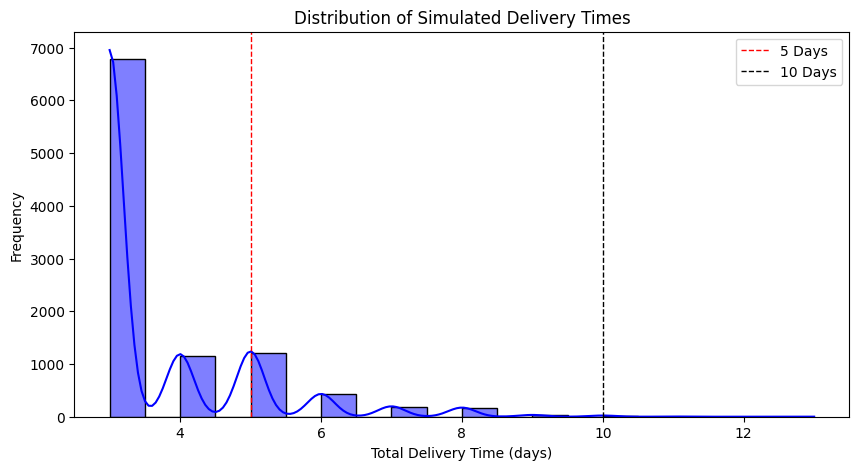

In [7]:
# Visualization
plt.figure(figsize=(10,5))
sns.histplot(delivery_times, bins=20, kde=True, color='blue')
plt.axvline(5, color='red', linestyle='dashed', linewidth=1, label='5 Days')
plt.axvline(10, color='black', linestyle='dashed', linewidth=1, label='10 Days')
plt.xlabel('Total Delivery Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Simulated Delivery Times')
plt.legend()
plt.show()